In [504]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import brown
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Smit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Smit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [505]:
df = pd.read_csv('spam.txt')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


* 1. Data cleaning
* 2. EDA
* 3. Text Preprocessing
* 4. Model building
* 5. Evaluation
* 6. Improvement
* 7. Website
* 8. Deploy

## 1. Data Cleaning

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [507]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [508]:
df.sample(5)

,v1,v2
2951,ham,Tell me whos this pls:-)
380,ham,I guess that's why you re worried. You must kn...
3938,ham,Y Ì_ wan to go there? C doctor?
2362,ham,How are you doing? Hope you've settled in for ...
1881,ham,Ok.. ÌÏ finishing soon?


In [509]:
#rename The colunms name:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)


In [510]:
df.sample(5)

,target,text
3260,ham,Yup i'm still having coffee wif my frens... My...
4766,spam,Your unique user ID is 1172. For removal send ...
2009,ham,I can't keep going through this. It was never ...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
422,ham,Siva is in hostel aha:-.


In [511]:
encoder = LabelEncoder() # for target value 

In [512]:
df["target"] = encoder.fit_transform(df["target"])

In [513]:
df.sample(5)

,target,text
5552,0,Have a safe trip to Nigeria. Wish you happines...
2324,0,Ok lor.
4848,0,either way works for me. I am &lt;#&gt; year...
3092,0,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
1823,0,Same as u... Dun wan... Y u dun like me alread...


In [514]:
#missing Value:
df.isnull().sum()

target    0
text      0
dtype: int64

In [515]:
#chack Dublicate value in datase:
df.duplicated().sum()

403

In [516]:
#remove all Dublicate value in dataset:
df = df.drop_duplicates(keep="first")

In [517]:
df.duplicated().sum()

0

In [518]:
df.shape

(5169, 2)

# Some exploratory data analysis in dataset (EDA):


In [519]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

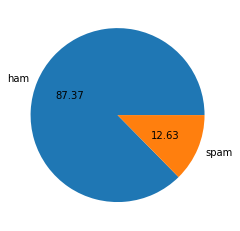

In [520]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show

In [521]:
# # Data is imbalanced
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [522]:
#!pip install nltk

In [523]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Smit\AppData\Local\Temp\ipykernel_23768\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [524]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [525]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Smit\AppData\Local\Temp\ipykernel_23768\192676766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [526]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [527]:
# number of sentence:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Smit\AppData\Local\Temp\ipykernel_23768\3031803936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [528]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [529]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977559,18.453279,1.947185
std,58.235798,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [530]:
#describe for **ham** Email:
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.458813,17.120903,1.799601
std,56.357554,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [531]:
#describe spam Email
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

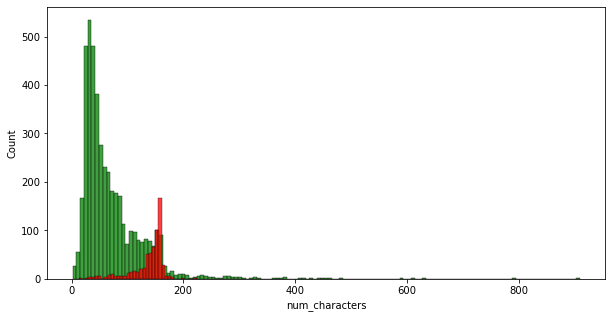

In [532]:
plt.figure(figsize=(10,5))

sns.histplot(df[df["target"]==0]["num_characters"],color="green") #ham
sns.histplot(df[df["target"]==1]["num_characters"],color="red")  #spam

<AxesSubplot:xlabel='num_words', ylabel='Count'>

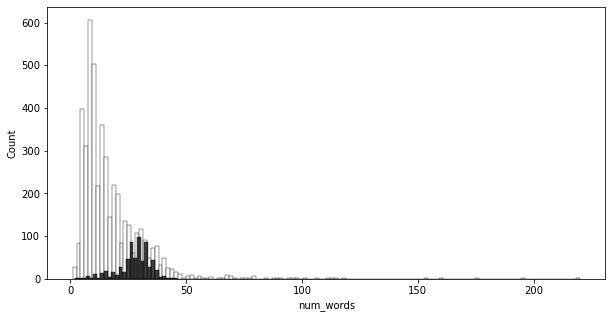

In [533]:
plt.figure(figsize=(10,5))

sns.histplot(df[df["target"]==0]["num_words"],color="white") #ham
sns.histplot(df[df["target"]==1]["num_words"],color="black") #spam

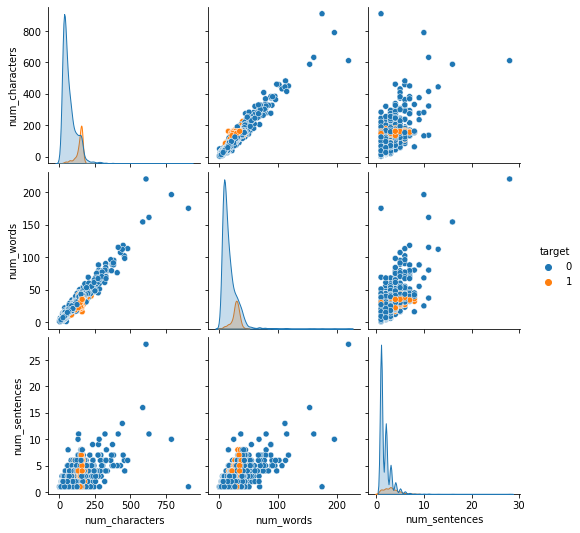

In [534]:
sns.pairplot(df,hue="target")

<AxesSubplot:>

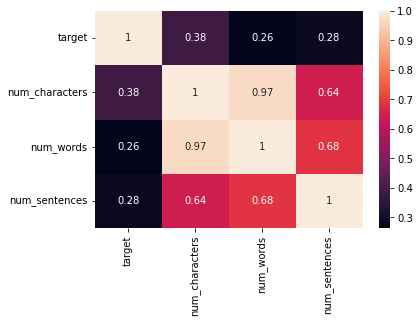

In [535]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessig 

* Lower case
* Tokenization
* Removeing special characters
* Removeing stop words and punctuation
* stemming

In [536]:
# def transform_text(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y = []
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.word('english') and i not in string.punctuation:
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
    
            
#     return " ".join(y)

In [537]:
import nltk
import string
from nltk.stem import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [538]:
#gon na home soon want talk stuff anymor tonight k cri enough today'

In [539]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I ve cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [540]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [541]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [542]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Smit\AppData\Local\Temp\ipykernel_23768\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [543]:

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [544]:
spam_corpus = []
for msg in df[df["target"]==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [545]:
len(spam_corpus)

9939

In [546]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


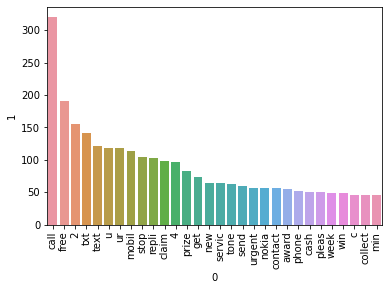

In [547]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [548]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\Smit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


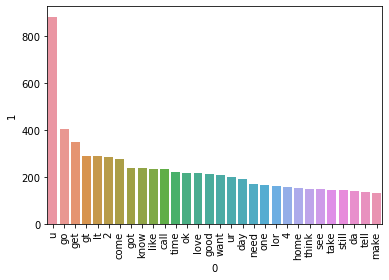

In [549]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

##  Model Buliding :


In [553]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv  = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) 

In [554]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [555]:
X.shape

(5169, 3000)

In [556]:
y=df["target"].values


In [558]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [559]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [560]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [561]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [562]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [563]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [564]:
# tfidf --> MNB for good nature 

In [565]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [566]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [567]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [568]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [569]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [570]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [572]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [573]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
# performance_df

In [574]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
# performance_df1

In [575]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [576]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [577]:
# new_df = performance_df.merge(temp_df,on='Algorithm')

In [578]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [579]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [580]:
# new_df_scaled.merge(temp_df,on='Algorithm')

In [581]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [582]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [583]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [584]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [585]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [586]:
from sklearn.ensemble import StackingClassifier

In [587]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [590]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [594]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [321]:
from sklearn.feature_extraction.text  import TfidfVectorizer

In [593]:
mnb.fit(X_train,y_train)

MultinomialNB()